In [1]:
import pandas as pd

In [2]:
urop_path = '/home/gridsan/afogelson/osfm/scripts/urop_samples/uniform_sample/uniform_urop_sample_labeled_with_binary.csv'
df = pd.read_csv(urop_path)
df = df[~df['urop'].isna()]
df['urop'] = df['urop'].apply(str.lower)
df = df[df['urop'] != 'select']

In [3]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,sentence,mcllm,modelKey,paperId,modelId_x,mc,modelId_y,mc_reduced,urop_sentence,urop,urop_assignee,gpt,mcllmr,mcllm_tuned,mcllm_tuned_binary
0,0,0,0,"in recent years, many large-scale pre-trained ...",background,417_gpt-3_175b_(davinci),d8d578d4ece329f17b025946587b1751721b9144,6b85b63579a916f705a8e10a49bd8d849d91b1fc,background,6b85b63579a916f705a8e10a49bd8d849d91b1fc,context,"in recent years, many large-scale pre-trained ...",background,Selinna,background,background,background,background
1,1,1,1,one of the known problems with contrastive tra...,background,1013_wave2vec_2.0_large,7f0c7c324675179f0e32c160d99c7066c7ab30ae,49a049dc85e2380dde80501a984878341dd8efdf,background,49a049dc85e2380dde80501a984878341dd8efdf,context,one of the known problems with contrastive tra...,background,Selinna,motivation,background,background,background
2,2,2,2,further work in compound scaling yielded model...,background,377_efficientnet-l2,970cb7b5b25da0f1f8b000add10960680fe8cd2e,4f2eda8077dc7a69bb2b4e0a1a086cf054adb3f9,background,4f2eda8077dc7a69bb2b4e0a1a086cf054adb3f9,context,further work in compound scaling yielded model...,future work,Selinna,future_work,background,background,background
3,3,3,3,"due to the high computing cost, conducting a t...",background,417_gpt-3_175b_(davinci),b6ec1e8f18185b4b3d46201359a440404575460c,6b85b63579a916f705a8e10a49bd8d849d91b1fc,background,6b85b63579a916f705a8e10a49bd8d849d91b1fc,context,"due to the high computing cost, conducting a t...",background,Selinna,motivation,background,background,background
4,4,4,4,## 1 introduction\n\n\nthe multilingual bert ...,background,1064_bert-large,1234fcc1577a32b829d2886fdf68375b9d4525e9,df2b0e26d0599ce3e70df8a9da02e51594e0e992,background,df2b0e26d0599ce3e70df8a9da02e51594e0e992,context,## 1 introduction\n\nthe multilingual bert mo...,background,Denis,background,background,background,background
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,196,"in order to overcome this difficulty, we chang...",uses,867_alexnet,0a297c382ac70a5d2830a08d060230008ed27f15,abd1c342495432171beb7ca8fd9551ef13cbd0ff,extends,abd1c342495432171beb7ca8fd9551ef13cbd0ff,extends,"in order to overcome this difficulty, we chang...",extends,Selinna,extends,uses,extends,extends
197,197,197,197,an example is shown in figure 1.\n\n\nour fram...,uses,920_opt-175b,b359105b2f6553c4699a2e988e459b8e4dce0ae4,13a0d8bb38f739990c8cd65a44061c6534f17221,extends,13a0d8bb38f739990c8cd65a44061c6534f17221,extends,an example is shown in figure 1.\n\nour framew...,differences,Denis,extends,extends,extends,extends
198,198,198,198,ernie expands the bert model (<cite>devlin et ...,extends,1064_bert-large,f2143085a851739b93e5d5693720b71e607d97bc,df2b0e26d0599ce3e70df8a9da02e51594e0e992,extends,df2b0e26d0599ce3e70df8a9da02e51594e0e992,extends,ernie expands the bert model (<cite>devlin et ...,extends,Selinna,extends,extends,extends,extends
199,199,199,199,"in the first part, a modified version of the c...",uses,867_alexnet,8d8a5f42d274ae3e893e1ff2076dea7bcaa7c3e8,abd1c342495432171beb7ca8fd9551ef13cbd0ff,extends,abd1c342495432171beb7ca8fd9551ef13cbd0ff,extends,"in the first part, a modified version of the c...",uses,Selinna,uses,uses,extends,extends


In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_label, x_label = 'urop', 'mcllm_tuned'
true, pred = df[y_label], df[x_label]

mapping = lambda s: {'background': 'context',
                     'future_work': 'context',
                    'differences': 'context',
                     'future work': 'context',
                     'motivation': 'context',
                     'similarities': 'context',
                     }.get(s) or s
true, pred = list(map(mapping, true)), list(map(mapping, pred))

cm = confusion_matrix(true, pred)

Text(50.722222222222214, 0.5, 'urop')

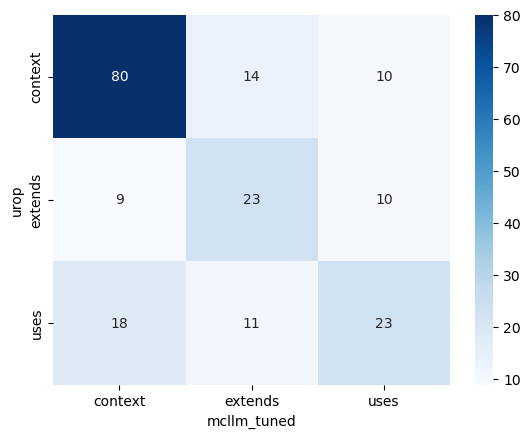

In [33]:
assert(len(set(true)) == 3), set(true)
assert(len(set(pred)) == 3), set(pred)
labels = ['context', 'extends', 'uses']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel(x_label)
plt.ylabel(y_label)

In [34]:
false_positives = (cm - cm * np.identity(3)).sum(axis = 0)/cm.sum(axis = 0)
false_negatives = (cm - cm * np.identity(3)).sum(axis = 1)/cm.sum(axis = 1)

np.stack([false_positives, false_negatives]).T

array([[0.25233645, 0.23076923],
       [0.52083333, 0.45238095],
       [0.46511628, 0.55769231]])

In [36]:
def get_examples(urop_label, model_label):
    mask = (df[y_label].apply(mapping) == urop_label) & (df[x_label].apply(mapping) == model_label) 
    return df[mask]

samples = get_examples(urop_label='extends', model_label = 'context')
idx = 4
print(samples['modelKey'].iloc[idx])
print(samples['sentence'].iloc[idx])
print(samples[y_label].iloc[idx])
print(samples[x_label].iloc[idx])

582_bart-large
we also propose a new setup for pre-training bart (<cite>lewis et al, 2019</cite>) - **keybart** (section 3), focused towards learning better representation of keyphrases in a generative setting.
extends
differences


In [37]:
for sentence in df[(df['urop'] == 'extends') & ~ (df['sentence'].apply(lambda s: s.find('fine') >= 0))]['sentence']:
    print("Sentence!")
    print(sentence)

Sentence!
#### 4.1.2 cnn architecture selection


the cnn was implemented using keras library and the initial architecture (**table 2**) is an adapted version of the alexnet (<cite>krizhevsky et al, 2012</cite>) to match the input size in our study.
Sentence!
the r-cnn [2] uses the imagenet database [22] for the training of the cnn adopted from krizhevsky et al <cite>[23]</cite>.
Sentence!
for the second architecture [5], we used an approach that combines a transformer, in our case, a bert-based model <cite>[6]</cite>, with an lstm as a way to overcome sequence length limitations for traditional transformers.
Sentence!
furthermore, to verify the universality of these two modules, we utilize bart <cite>lewis et al (2020)</cite> and mt5 xue et al (2021) as the backbone networks, respectively.
Sentence!
to reduce the impact of the framework of model selection on the interpretable prediction, we selected the bert (<cite>devlin et al, 2018</cite>) model as the basic model framework of the b